In [1]:
%load_ext autoreload
%autoreload 1

from sklearn import svm
from sklearn.cluster import KMeans

%aimport loader
%aimport tirf

In [2]:
def get_set(small=True):
    """
    Return all variables needed to access either the small images dataset, or the normal one.
    """
    if small:
        return '_64x128_H96', 'train', 'test'
    else:
        return '', 'Train', 'Test'


folder = 'INRIAPerson'
folder_suffix, train_suffix, test_suffix = get_set(small=False)

# Unprocessed images

With Soft Linear SVM (C=0.01).

In [7]:
train_x, train_y = loader.get_set(folder, folder_suffix, phase=train_suffix, N=None, algo=None)
test_x, test_y = loader.get_set(folder, folder_suffix, phase=test_suffix, N=None, algo=None)

clf_img = svm.LinearSVC(C=0.01)
clf_img.fit(train_x, train_y.ravel())
print('Score: ', loader.test_accuracy(clf_img, test_x, test_y))

loader.save_classifier(clf_img, name='image.pkl')

Loading in INRIAPerson/Train
type pos: 0th image...
type pos: 100th image...
type pos: 200th image...
type pos: 300th image...
type pos: 400th image...
type pos: 500th image...
type pos: 600th image...
Finished Train - pos
type neg: 0th image...
type neg: 100th image...
type neg: 200th image...
type neg: 300th image...
type neg: 400th image...
type neg: 500th image...
type neg: 600th image...
type neg: 700th image...
type neg: 800th image...
type neg: 900th image...
Finished Train - neg
Loading in INRIAPerson/Test
type pos: 0th image...
type pos: 100th image...
type pos: 200th image...
Finished Test - pos
type neg: 0th image...
type neg: 100th image...
type neg: 200th image...
Finished Test - neg
Score:  0.7670068027210885


# Hog-processed images

With Soft Linear SVM (C=0.01)

In [9]:
train_x, train_y = loader.get_set(folder, folder_suffix, phase=train_suffix, N=None, algo='hog')
test_x, test_y = loader.get_set(folder, folder_suffix, phase=test_suffix, N=None, algo='hog')

clf_img = svm.LinearSVC(C=0.01)
clf_img.fit(train_x, train_y.ravel())
print('Score: ', loader.test_accuracy(clf_img, test_x, test_y))

loader.save_classifier(clf_img, name='hog.pkl')

Loading in INRIAPerson/Train
type pos: 0th image...
type pos: 100th image...
type pos: 200th image...
type pos: 300th image...
type pos: 400th image...
type pos: 500th image...
type pos: 600th image...
Finished Train - pos
type neg: 0th image...
type neg: 100th image...
type neg: 200th image...
type neg: 300th image...
type neg: 400th image...
type neg: 500th image...
type neg: 600th image...
type neg: 700th image...
type neg: 800th image...
type neg: 900th image...
Finished Train - neg
Loading in INRIAPerson/Test
type pos: 0th image...
type pos: 100th image...
type pos: 200th image...
Finished Test - pos
type neg: 0th image...
type neg: 100th image...
type neg: 200th image...
Finished Test - neg
Score:  0.8367346938775511


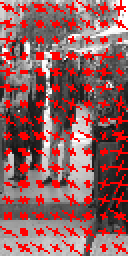

In [3]:
tirf.visualize_hog('INRIAPerson/Train/pos/crop001001.png')

In [4]:
hog_svm = loader.load_classifier(name='hog.pkl')

/Users/arthur/anaconda3/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator LinearSVC from version 0.18.1 when using version 0.18.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [6]:
hog_svm.predict(tirf.main.get_hog_features('INRIAPerson/Train/pos/crop001001.png'))

/Users/arthur/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 1.])

In [7]:
hog_svm.predict(tirf.main.get_hog_features('images/ref_canette.jpg'))

/Users/arthur/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 0.])

# Sift-processed images

With Soft Linear SVM (C=0.01)

In [13]:
train_x, train_y = loader.get_set(folder, folder_suffix, phase=train_suffix, N=None, algo='sift')
test_x, test_y = loader.get_set(folder, folder_suffix, phase=test_suffix, N=None, algo='sift')

clf_img = svm.LinearSVC(C=0.01)
clf_img.fit(train_x, train_y.ravel())
print('Score: ', loader.test_accuracy(clf_img, test_x, test_y))

loader.save_classifier(clf_img, name='sift.pkl')

Loading in INRIAPerson/Train
type pos: 0th image...
type pos: 100th image...
type pos: 200th image...
type pos: 300th image...
type pos: 400th image...
type pos: 500th image...
type pos: 600th image...
Finished Train - pos
type neg: 0th image...
type neg: 100th image...
type neg: 200th image...
type neg: 300th image...
type neg: 400th image...
type neg: 500th image...
type neg: 600th image...
type neg: 700th image...
type neg: 800th image...
type neg: 900th image...
Finished Train - neg
Loading in INRIAPerson/Test
type pos: 0th image...
type pos: 100th image...
type pos: 200th image...
Finished Test - pos
type neg: 0th image...
type neg: 100th image...
type neg: 200th image...
Finished Test - neg
Score:  0.4931972789115646


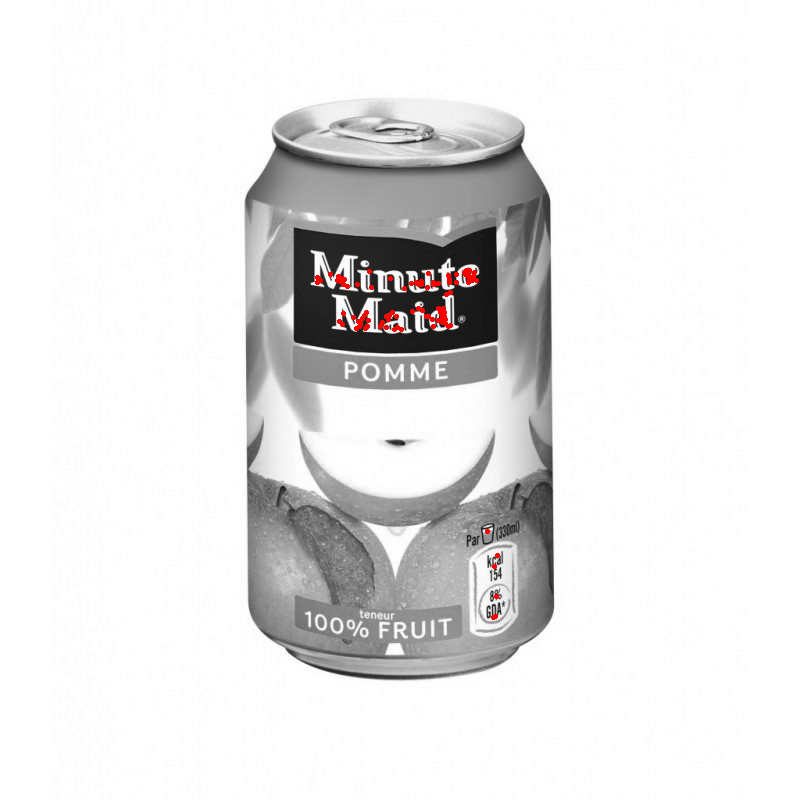

In [4]:
tirf.visualize_sift('images/ref_canette.jpg')

## Sift with KMeans + SVM

In [17]:
train_x, train_y = loader.get_set(folder, folder_suffix, phase=train_suffix, N=None, algo='sift')
test_x, test_y = loader.get_set(folder, folder_suffix, phase=test_suffix, N=None, algo='sift')

Loading in INRIAPerson/Train
type pos: 0th image...
type pos: 100th image...
type pos: 200th image...
type pos: 300th image...
type pos: 400th image...
type pos: 500th image...
type pos: 600th image...
Finished Train - pos
type neg: 0th image...
type neg: 100th image...
type neg: 200th image...
type neg: 300th image...
type neg: 400th image...
type neg: 500th image...
type neg: 600th image...
type neg: 700th image...
type neg: 800th image...
type neg: 900th image...
Finished Train - neg
Loading in INRIAPerson/Test
type pos: 0th image...
type pos: 100th image...
type pos: 200th image...
Finished Test - pos
type neg: 0th image...
type neg: 100th image...
type neg: 200th image...
Finished Test - neg


In [18]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(train_x)

train_clusters = kmeans.predict(train_x)
test_clusters = kmeans.predict(test_x)

train_clusters = train_clusters.reshape((train_clusters.shape[0], 1))
test_clusters = test_clusters.reshape((test_clusters.shape[0], 1))


clf_img = svm.LinearSVC(C=0.01)
clf_img.fit(train_clusters, train_y.ravel())
print('Score: ', loader.test_accuracy(clf_img, test_clusters, test_y))


Score:  0.5102040816326531
